In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime
from datetime import *

In [2]:
# Reading data from csv while parsing date column as datetime and index
mydateparser = lambda x: pd.datetime.strptime(x, "%d-%b-%y")
stockData_df = pd.read_csv('/Users/psai1/spx.csv', infer_datetime_format=True, \
                          parse_dates=['date'], date_parser=mydateparser, index_col ="date")

<ipython-input-2-9622e21e175a>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  mydateparser = lambda x: pd.datetime.strptime(x, "%d-%b-%y")


In [3]:
stockData_df.sample(5)

,close
date,
2004-05-19,1088.68
2013-07-01,1614.96
1992-03-16,406.39
2013-10-10,1692.56
2000-04-14,1356.56


In [4]:
stockData_df.shape

(8192, 1)

In [5]:
# Taking latest complete one year data to ease coding
stockData_2017_df = stockData_df[(stockData_df.index.year == 2017)]

In [6]:
stockData_2017_df.shape
print(stockData_2017_df)

              close
date               
2017-01-03  2257.83
2017-01-04  2270.75
2017-01-05  2269.00
2017-01-06  2276.98
2017-01-09  2268.90
...             ...
2017-12-22  2683.34
2017-12-26  2680.50
2017-12-27  2682.62
2017-12-28  2687.54
2017-12-29  2673.61

[251 rows x 1 columns]


In [7]:
#Check if the date is in dataframe or not
def Get_Valid_Date(given_date,df):
    try:
        giv_date=str(given_date)
        year=giv_date[0:4]
        month=giv_date[5:7]
        day=giv_date[8:10]
        current_date=datetime(int(year),int(month),int(day))
        cur_date=current_date.date()
        condition=given_date in df.index
        if cur_date>date(2017, 12, 29):
            return date(2017, 12, 29)
        elif cur_date<date(2017, 1, 3):
            return date(2017, 1, 3)
        elif condition==True:
            return cur_date
        else:
            reduced_date = current_date - timedelta(days=1)
            return Get_Valid_Date(reduced_date,df)
    except ValueError:
        giv_date=str(given_date)
        year=giv_date[0:4]
        month=giv_date[5:7]
        int_day=int(giv_date[8:10])-1
        day=str(int_day)
        present_date=year+"-"+month+"-"+day
        return Get_Valid_Date(present_date,df)
        
        

In [8]:
checked_date=Get_Valid_Date("2017-03-03",stockData_2017_df)
checked_date 

datetime.date(2017, 3, 3)

In [9]:
# Get closing value for the given date 
def Get_closing_Value(given_date,df):
    result_date=str(Get_Valid_Date(given_date,df))
    day_close=df.loc[result_date,["close"]]
    return day_close

In [10]:
Get_closing_Value("2017-03-03",stockData_2017_df)

close    2383.12
Name: 2017-03-03 00:00:00, dtype: float64

In [11]:
# Calculate percentage growth when given day closing and dataframe
def Cal_per_growth(d_close, df):
    final_close=df.iloc[-1]
    d_close_value=Get_closing_Value(d_close,df)
    return ((final_close-d_close_value)/d_close_value)*100

In [12]:
Cal_per_growth("2017-03-03",stockData_2017_df)

close    12.189483
dtype: float64

In [13]:
# Calculate average growth of a given day of the month in the given dataframe
def Cal_avg_growth(day_of_month, df):
    sum=0
    for i in range(1,10):
        if day_of_month<10:  
            loop_date="2017-0"+str(i)+"-0"+str(day_of_month)
            loop_avg_growth=Cal_per_growth(loop_date,df)
            sum=sum+loop_avg_growth
        else :  
            loop_date="2017-0"+str(i)+"-"+str(day_of_month)
            loop_avg_growth=Cal_per_growth(loop_date,df)
            sum=sum+loop_avg_growth
    for i in range(10,13):
        if day_of_month<10:  
            loop_date="2017-"+str(i)+"-0"+str(day_of_month)
            loop_avg_growth=Cal_per_growth(loop_date,df)
            sum=sum+loop_avg_growth
        else :  
            loop_date="2017-"+str(i)+"-"+str(day_of_month)
            loop_avg_growth=Cal_per_growth(loop_date,df)
            sum=sum+loop_avg_growth
            
    avg_percent_growth_one_day_full_year=sum/12
    return avg_percent_growth_one_day_full_year

In [15]:
Cal_avg_growth(30,stockData_2017_df)

close    8.705487
dtype: float64

In [16]:
def Cal_avg_growth_allDays(df):
    final= pd.DataFrame({'day': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]})
    final.set_index('day')
    result=[]
    for i in range(1,32):
        result.append(Cal_avg_growth(i, df))
    final["Average Growth"]=result
    return final

In [17]:
Result_table=Cal_avg_growth_allDays(stockData_2017_df)
Result_table

,day,Average Growth
0,1,close 9.968917 dtype: float64
1,2,close 9.933011 dtype: float64
2,3,close 9.838061 dtype: float64
3,4,close 9.752149 dtype: float64
4,5,close 9.799334 dtype: float64
5,6,close 9.881239 dtype: float64
6,7,close 9.804748 dtype: float64
7,8,close 9.793305 dtype: float64
8,9,close 9.833718 dtype: float64
9,10,close 9.862929 dtype: float64


In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

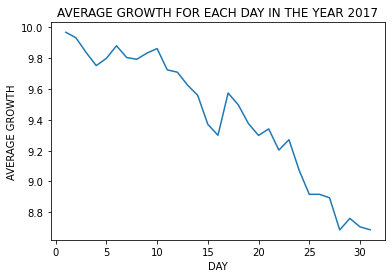

In [31]:
x=Result_table["day"]
y=Result_table["Average Growth"]
plt.plot(x, y)
plt.xlabel('DAY')
plt.ylabel('AVERAGE GROWTH')
plt.title('AVERAGE GROWTH FOR EACH DAY IN THE YEAR 2017')
plt.show()

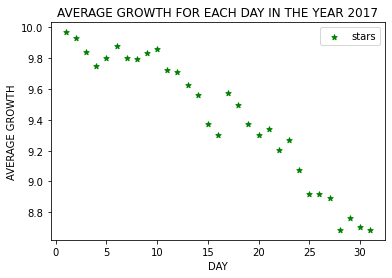

In [33]:
x=Result_table["day"]
y=Result_table["Average Growth"]
plt.scatter(x, y, label= "stars", color= "green", marker= "*", s=31)
plt.xlabel('DAY')
plt.ylabel('AVERAGE GROWTH')
plt.title('AVERAGE GROWTH FOR EACH DAY IN THE YEAR 2017')
plt.legend()
plt.show()

In [17]:
Result_table.to_csv('Stocks_data.csv', header=True, index=False)

In [1]:
import numpy as np
import pandas as pd

# **Loading the data**

In [2]:
df = pd.read_csv("stock headlines.csv", encoding = 'ISO-8859-1')

# **Exploring the dataset**

In [3]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [4]:
df.shape

(4101, 27)

In [5]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


*Note: Here 'Label' is a binary attribute which consists 0 - Stock 
price goes down or stays the same, 1 - Stock price goes up.*

In [6]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

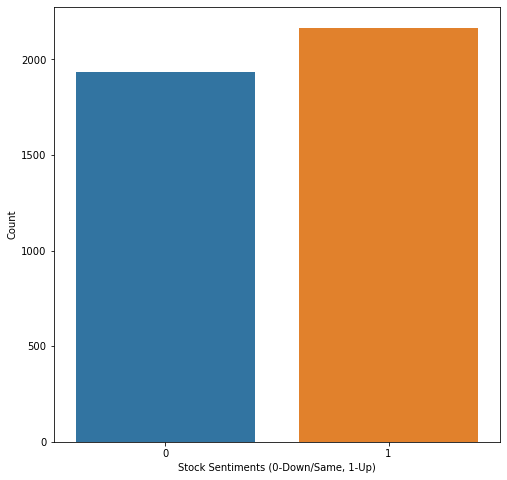

In [7]:
# Visualizing the count of 'Label' column from the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

# **Data Cleaning and Preprocessing**

In [8]:
print(df.shape)

(4101, 27)


In [9]:
# Finding any NaN values
df.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

In [10]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(4098, 27)


In [11]:
df_copy = df.copy()

In [12]:
df_copy.reset_index(inplace=True)

In [13]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [14]:
# Splitting the dataset into train an test set
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3972, 28), Test size: (378, 28)


In [15]:
train.columns

Index(['index', 'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [16]:
# Splitting the dataset
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [17]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [18]:
# Removing punctuation and special character from the text
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [19]:
# Renaming columns
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns

In [20]:
# Converting the entire text to lower case
for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()

In [21]:
# Joining all the columns
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [22]:
train_headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [23]:
test_headlines[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistani port city of karachi are bel

In [24]:
# Creating corpus of train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):
  
  # Tokenizing the news-title by words
  words = train_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  train_corpus.append(headline)

In [25]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):
  
  # Tokenizing the news-title by words
  words = test_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  test_corpus.append(headline)

In [26]:
train_corpus[0:10]

['hindranc oper extract leak report scorecard hugh instant hit buoy blue jack get skate ice cold alex chao maracana build unit deplet leicest prevail elliott spoil everton parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar debut doubl southgat strike leed pay penalti hammer hand robson youth lesson saint parti like wear wolv turn lamb stump mike catch testi gough taunt langer escap hit flintoff injuri pile woe england hunter threaten jospin new battl somm kohl successor drawn scandal differ men women sara denver nurs turn solicitor diana landmin crusad put tori panic yeltsin resign caught opposit flat foot russian roulett sold recov titl',
 'scorecard best lake scene leader german sleaz inquiri cheerio boyo main recommend cubi kill fee cubi kill fee cubi kill fee hopkin furiou foster lack hannib appetit cubi kill fee tale two tail say like like say elbow eye nippl task forc assess risk asteroid collis found last critic list time live dear doctor irish cou

In [27]:
test_corpus[0:10]

['case cancer result sheer bad luck rather unhealthi lifestyl diet even inherit gene new research suggest random mutat occur dna cell divid respons two third adult cancer across wide rang tissu iran dismiss unit state effort fight islam state ploy advanc u polici region realiti unit state act elimin daesh even interest weaken daesh interest manag poll one german would join anti muslim march uk royal famili princ andrew name us lawsuit underag sex alleg asylum seeker refus leav bu arriv destin rural northern sweden demand taken back malm big citi pakistani boat blow self india navi chase four peopl board vessel near pakistani port citi karachi believ kill dramat episod arabian sea new year eve accord india defenc ministri sweden hit third mosqu arson attack week car set alight french new year salari top ceo rose twice fast averag canadian sinc recess studi norway violat equal pay law judg say judg find consul employe unjustli paid less male counterpart imam want radic recruit muslim you

In [28]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

In [29]:
import sys
print(sys.executable)

C:\Users\psai1\anaconda3\python.exe


In [30]:
!<C:\Users\psai1\anaconda3\python.exe>/python -m pip install wordcloud


Access is denied.


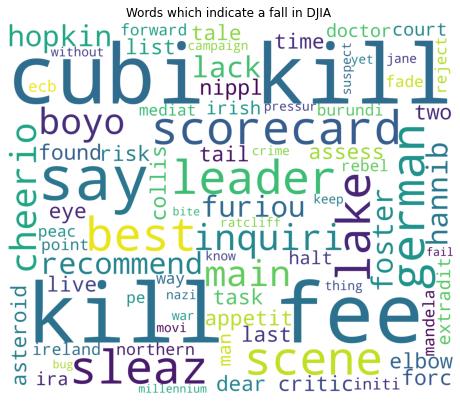

In [31]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

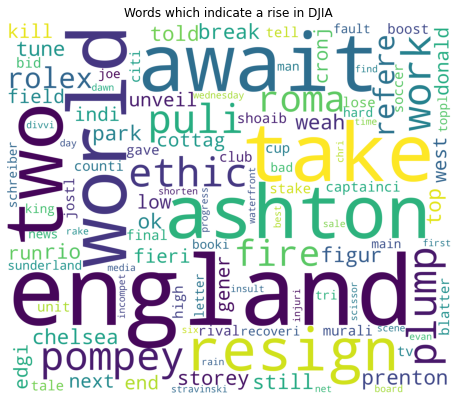

In [32]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [33]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [34]:
X_test = cv.transform(test_corpus).toarray()

# **Model Building**

## *Logistic Regression*

In [35]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [36]:
lr_y_pred = lr_classifier.predict(X_test)

In [37]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.98%
Precision score is: 0.87
Recall score is: 0.85


In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [39]:
lr_cm

array([[162,  24],
       [ 29, 163]], dtype=int64)

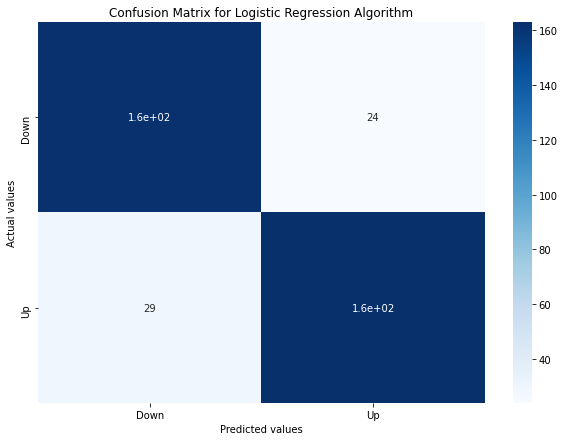

In [40]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

## *Random Forest Classifier*

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [42]:
rf_y_pred = rf_classifier.predict(X_test)

In [43]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 82.8%
Precision score is: 0.82
Recall score is: 0.85


In [44]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

In [45]:
rf_cm

array([[150,  36],
       [ 29, 163]], dtype=int64)

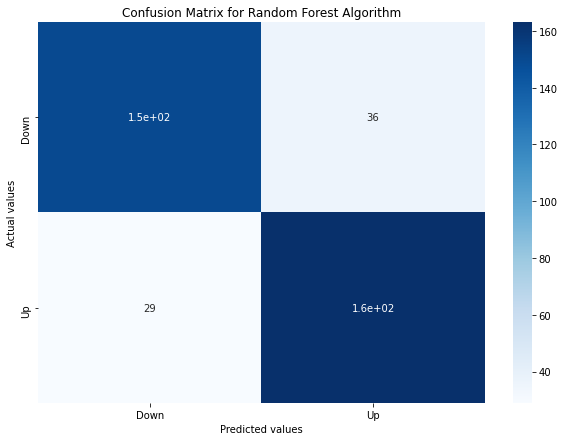

In [46]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

## *Multinomial Naive Bayes*

In [47]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [48]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [49]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.86%
Precision score is: 0.85
Recall score is: 0.83


In [50]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [51]:
nb_cm

array([[158,  28],
       [ 33, 159]], dtype=int64)

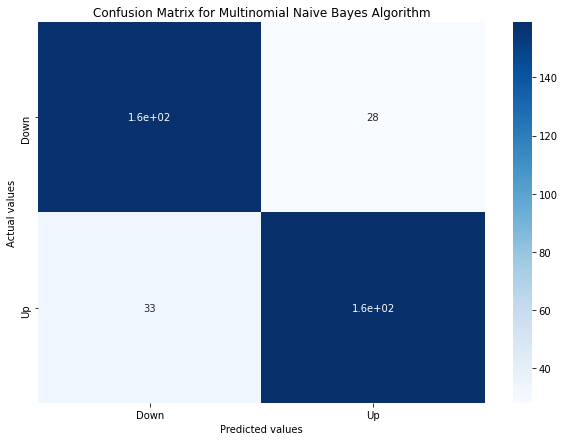

In [52]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

# **Predictions**

In [53]:
import re

def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [54]:
# For generating random integer
from random import randint

In [55]:
sample_test = df_copy[df_copy['Date'] > '20141231']

In [56]:
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [57]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: El Chapo' Being Taken to Same Prison He Escaped from Six Months Ago
Prediction: The stock price will remain the same or will go down.


In [58]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Efficiency up, turnover down: Sweden experiments with six-hour working day | World news | The Guardian
Prediction: The stock price will remain the same or will go down.


In [59]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: US State Dept declares ISIS is committing genocide in Iraq, Syria
Prediction: The stock price will remain the same or will go down.


In [60]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = ""
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: 
Prediction: The stock price will remain the same or will go down.


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df=pd.read_csv('stock headlines.csv', encoding="ISO-8859-1")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [63]:
train=df[df['Date']<'20150101']
test=df[df['Date']>'20141231']
train.shape

(3975, 27)

In [64]:
#Removing punctuations 
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]", " ",regex=True, inplace=True)

In [65]:
data.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [66]:
for col in data.columns:
    data[col]=data[col].str.lower()
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [67]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

# Using TF-IDF

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [69]:
#implement TF-IDF
tfvector=TfidfVectorizer(ngram_range=(2,3))
train_df=tfvector.fit_transform(headlines)

In [70]:
import pickle
pickle.dump(tfvector, open('tfvector.pkl', 'wb'))

# RandomForestClassifier

In [71]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(train_df,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

# plot_confusion_matrix

In [72]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
# Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = tfvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

[[149  37]
 [ 16 176]]
0.8597883597883598
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       186
           1       0.83      0.92      0.87       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378

Confusion matrix, without normalization


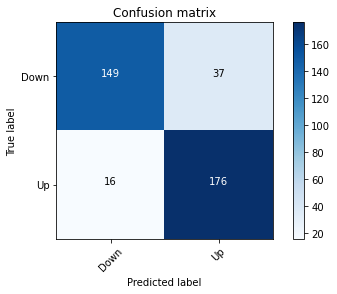

In [74]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# MultinomialNB

In [75]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_df,train['Label'])

MultinomialNB()

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378

Confusion matrix, without normalization


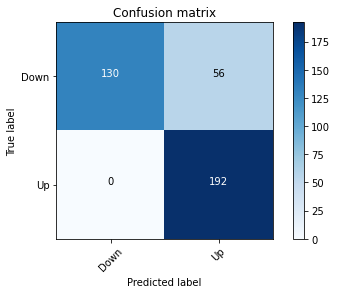

In [76]:
predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# PassiveAggressiveClassifier

In [77]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()

pa.fit(train_df,train['Label'])

PassiveAggressiveClassifier()

In [78]:
import pickle
filename = 'stock_senti.pkl'
pickle.dump(pa, open(filename, 'wb'))

[[145  41]
 [ 15 177]]
0.8518518518518519
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       186
           1       0.81      0.92      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.85      0.85       378
weighted avg       0.86      0.85      0.85       378

Confusion matrix, without normalization


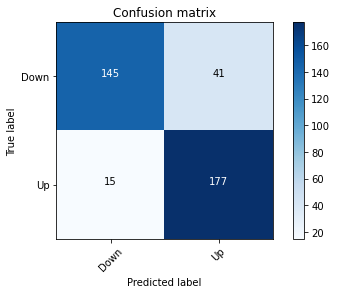

In [79]:
predictions = pa.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Using bag of words

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
#implement bag of words
bow=CountVectorizer(ngram_range=(2,3))
train_df=bow.fit_transform(headlines)

# RandomForestClassifier using Bag of words

In [81]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(train_df,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [82]:
predictions = randomclassifier.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[  0 186]
 [  0 192]]
0.5079365079365079
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



C:\Users\psai1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\psai1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\psai1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MultinomialNB using Bag of words

[[141  45]
 [ 10 182]]
0.8544973544973545
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       186
           1       0.80      0.95      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378

Confusion matrix, without normalization


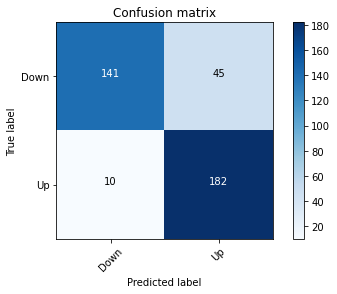

In [83]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_df,train['Label'])

predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# PassiveAggressiveClassifier using Bag of Words

[[154  32]
 [ 24 168]]
0.8518518518518519
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       186
           1       0.84      0.88      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378

Confusion matrix, without normalization


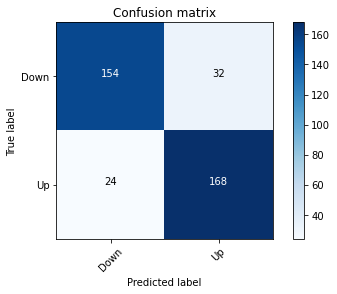

In [84]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()
pa.fit(train_df,train['Label'])

predictions = pa.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Spark

In [85]:
import findspark
findspark.init()
import pyspark
from pyspark.sql.session import SparkSession
spark = SparkSession.builder.appName("Yahoo finance").getOrCreate()

In [86]:
import yfinance as yf
import csv
from pyspark.sql.functions import date_format

from pyspark.sql.functions import dayofmonth, hour, dayofyear, month, year, weekofyear

ticker = '^GSPC' # tsla
start_dt = '2021-1-1'
end_dt = '2022-12-31'
frequency = '1d'

#get data for SPX
data = yf.Ticker(ticker)
#ticker_name = data.info['longName']

#get weekly historical prices for this ticker
df = data.history(interval = frequency, start = start_dt, end = end_dt)

# write data into a csv file
df.to_csv('spx.csv')

# Let Spark know about the header and infer the Schema types!
df = spark.read.csv('spx.csv',inferSchema=True,header=True)

# create new dataframe month_df adding new columns month, diff, high_low_diff and weekofyear
daily_df = df.withColumn('Month', month(df['Date'])).withColumn('diff', df['Open']-df['Close']).withColumn('high_low_diff', df['High']-df['Low']) \
.withColumn('week_of_year', weekofyear(df.Date)).withColumn('week_day', date_format(df.Date, "EEEE"))
daily_df.show(5)

+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+----------------+------------+---------+
|                Date|             Open|             High|              Low|            Close|    Volume|Dividends|Stock Splits|Month|            diff|   high_low_diff|week_of_year| week_day|
+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+----------------+------------+---------+
|2021-01-04 00:00:...|3764.610107421875|3769.989990234375|  3662.7099609375| 3700.64990234375|5015000000|      0.0|         0.0|    1| 63.960205078125|107.280029296875|           1|   Monday|
|2021-01-05 00:00:...| 3698.02001953125|   3737.830078125|3695.070068359375|3726.860107421875|4591020000|      0.0|         0.0|    1|-28.840087890625| 42.760009765625|           1|  Tuesday|
|2021-01-06 00:00:...|3712.199951171875|

In [87]:
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where ((diff > 20 or diff < -20) and (Date > "2022-01-01 00:00:00"))').show(50)

+--------------------+----------------+----------------+----------------+----------------+----------+---------+------------+-----+----------------+---------------+------------+---------+
|                Date|            Open|            High|             Low|           Close|    Volume|Dividends|Stock Splits|Month|            diff|  high_low_diff|week_of_year| week_day|
+--------------------+----------------+----------------+----------------+----------------+----------+---------+------------+-----+----------------+---------------+------------+---------+
|2022-01-05 00:00:...|  4787.990234375| 4797.7001953125|4699.43994140625|  4700.580078125|4887960000|      0.0|         0.0|    1|     87.41015625| 98.26025390625|           1|Wednesday|
|2022-01-07 00:00:...|   4697.66015625| 4707.9501953125|  4662.740234375|4677.02978515625|4181510000|      0.0|         0.0|    1|  20.63037109375|  45.2099609375|           1|   Friday|
|2022-01-11 00:00:...|4669.14013671875| 4714.1298828125|4638.2700

In [88]:
# total days when market was open in 2022
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where ((Date > "2021-01-01 00:00:00") and (Date < "2022-01-01 00:00:00"))').count()

252

In [89]:
# total days when market was open in 2022
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where Date > "2022-01-01 00:00:00"').count()

251

In [90]:
#number of days where spx moved by 20 (difference between open and close) in 2021
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where ((diff > 20 or diff < -20) \
and ((Date > "2021-01-01 00:00:00") and ((Date < "2022-01-01 00:00:00"))))').count()

118

In [91]:
#number of days where spx moved by 20 (difference between open and close) in 2022
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where ((diff > 20 or diff < -20)) \
and ((Date > "2022-01-01 00:00:00"))').count()

184

In [92]:
#number of days where spx moved by less 20 (difference between open and close)
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where ((diff < 20 and diff > -20) and (Date > "2022-01-01 00:00:00"))').count()

67

In [93]:
#number of days where spx moved by 20 (difference between high and low of the day)
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where ((high_low_diff > 20 or high_low_diff < -20) and (Date > "2022-01-01 00:00:00"))').count()

250

In [94]:
# number of days when spx moved by 40 (difference between high and low of the day)
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where ((high_low_diff > 40 or high_low_diff < -40) and (Date > "2022-01-01 00:00:00"))').count()

227

In [95]:
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where ((high_low_diff > 40 or high_low_diff < -40) and (Date > "2022-01-01 00:00:00"))').show()

+--------------------+----------------+----------------+----------------+----------------+----------+---------+------------+-----+---------------+---------------+------------+---------+
|                Date|            Open|            High|             Low|           Close|    Volume|Dividends|Stock Splits|Month|           diff|  high_low_diff|week_of_year| week_day|
+--------------------+----------------+----------------+----------------+----------------+----------+---------+------------+-----+---------------+---------------+------------+---------+
|2022-01-04 00:00:...|  4804.509765625| 4818.6201171875|4774.27001953125| 4793.5400390625|4683170000|      0.0|         0.0|    1|  10.9697265625| 44.35009765625|           1|  Tuesday|
|2022-01-05 00:00:...|  4787.990234375| 4797.7001953125|4699.43994140625|  4700.580078125|4887960000|      0.0|         0.0|    1|    87.41015625| 98.26025390625|           1|Wednesday|
|2022-01-06 00:00:...|4693.39013671875|  4725.009765625|  4671.2597656

In [96]:
# number of days in each week where spx moved by 40 in either direction
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select week_of_year, count(*) from SPXDaily where ((diff > 40 or diff < -40) \
and (Date > "2022-01-01 00:00:00")) \
group by week_of_year \
order by week_of_year').show(50)

+------------+--------+
|week_of_year|count(1)|
+------------+--------+
|           1|       1|
|           2|       2|
|           3|       4|
|           4|       4|
|           5|       2|
|           6|       4|
|           7|       2|
|           8|       3|
|           9|       2|
|          10|       3|
|          11|       4|
|          12|       2|
|          13|       1|
|          14|       1|
|          15|       4|
|          16|       3|
|          17|       4|
|          18|       2|
|          19|       3|
|          20|       1|
|          21|       4|
|          22|       2|
|          23|       3|
|          24|       2|
|          25|       2|
|          26|       2|
|          27|       1|
|          28|       1|
|          29|       3|
|          30|       3|
|          31|       1|
|          32|       1|
|          34|       3|
|          35|       3|
|          36|       3|
|          37|       1|
|          38|       2|
|          39|       3|
|          40|  

In [97]:
# total weeks so far this year
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select max(week_of_year) from SPXDaily').show()

+-----------------+
|max(week_of_year)|
+-----------------+
|               52|
+-----------------+



In [98]:
# number of days in each week where spx moved by less than 40 in either direction
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select week_of_year, count(*) from SPXDaily where ((diff < 40 and diff > -40) \
and (Date > "2022-01-01 00:00:00")) \
group by week_of_year \
order by week_of_year').show(50)

+------------+--------+
|week_of_year|count(1)|
+------------+--------+
|           1|       4|
|           2|       3|
|           4|       1|
|           5|       3|
|           6|       1|
|           7|       3|
|           8|       1|
|           9|       3|
|          10|       2|
|          11|       1|
|          12|       3|
|          13|       4|
|          14|       4|
|          16|       2|
|          17|       1|
|          18|       3|
|          19|       2|
|          20|       4|
|          21|       1|
|          22|       2|
|          23|       2|
|          24|       3|
|          25|       2|
|          26|       3|
|          27|       3|
|          28|       4|
|          29|       2|
|          30|       2|
|          31|       4|
|          32|       4|
|          33|       5|
|          34|       2|
|          35|       2|
|          36|       1|
|          37|       4|
|          38|       3|
|          39|       2|
|          40|       2|
|          41|  

In [99]:
# check why in week 47, there were only 2 days over 40/-40 and 2 days were between -40 and 40
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily where week_of_year = 47').show()

+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+---------------+------------+---------+
|                Date|             Open|             High|              Low|            Close|    Volume|Dividends|Stock Splits|Month|            diff|  high_low_diff|week_of_year| week_day|
+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+---------------+------------+---------+
|2021-11-22 00:00:...|           4712.0|   4743.830078125|   4682.169921875| 4682.93994140625|4441100000|      0.0|         0.0|   11|  29.06005859375|    61.66015625|          47|   Monday|
|2021-11-23 00:00:...| 4678.47998046875| 4699.39013671875|    4652.66015625|  4690.7001953125|4277590000|      0.0|         0.0|   11| -12.22021484375| 46.72998046875|          47|  Tuesday|
|2021-11-24 00:00:...| 4675.77978515625|  470

In [100]:
#number of days in each month where SPX moved by 40 in either direction
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select month, count(*) from SPXDaily where ((diff > 40 or diff < -40) \
and (Date > "2022-01-01 00:00:00")) \
group by month \
order by month').show()

+-----+--------+
|month|count(1)|
+-----+--------+
|    1|      12|
|    2|      10|
|    3|      12|
|    4|      12|
|    5|      10|
|    6|      10|
|    7|       9|
|    8|       7|
|    9|      10|
|   10|       8|
|   11|       6|
|   12|       7|
+-----+--------+



In [101]:
#number of days in each month where SPX moved by less than 40 in either direction
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select month, count(*) from SPXDaily where ((diff < 40 and diff > -40) \
and (Date > "2022-01-01 00:00:00")) \
group by month \
order by month').show(50)

+-----+--------+
|month|count(1)|
+-----+--------+
|    1|       8|
|    2|       9|
|    3|      11|
|    4|       8|
|    5|      11|
|    6|      11|
|    7|      11|
|    8|      16|
|    9|      11|
|   10|      13|
|   11|      15|
|   12|      14|
+-----+--------+



In [102]:
# number of days by week_day where spx moved by 40 in either direction
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select week_day, count(*) from SPXDaily where ((diff > 40 or  diff < -40) \
and (Date > "2022-01-01 00:00:00")) \
group by week_day \
order by week_day').show()

+---------+--------+
| week_day|count(1)|
+---------+--------+
|   Friday|      24|
|   Monday|      15|
| Thursday|      28|
|  Tuesday|      22|
|Wednesday|      24|
+---------+--------+



In [103]:
# number of days by week_day where spx moved less than 40 in either direction
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select week_day, count(*) from SPXDaily where ((diff < 40 and diff > -40) \
and (Date > "2022-01-01 00:00:00")) \
group by week_day \
order by week_day').show()

+---------+--------+
| week_day|count(1)|
+---------+--------+
|   Friday|      27|
|   Monday|      30|
| Thursday|      23|
|  Tuesday|      30|
|Wednesday|      28|
+---------+--------+



In [104]:
from pyspark.sql.functions import dayofmonth, hour, dayofyear, month, year, weekofyear, dayofweek
from pyspark.sql.functions import date_format
from pyspark.sql.functions import col
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily \
           where ((diff between -10 and 10) \
                   and (date_format(Date, "EEEE") == "Monday") \
                   and year(Date) == 2022)').show()

+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+--------------+---------------+------------+--------+
|                Date|             Open|             High|              Low|            Close|    Volume|Dividends|Stock Splits|Month|          diff|  high_low_diff|week_of_year|week_day|
+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+--------------+---------------+------------+--------+
|2022-03-21 00:00:...| 4462.39990234375|          4481.75|  4424.2998046875| 4461.18017578125|4869820000|      0.0|         0.0|    3|  1.2197265625|  57.4501953125|          12|  Monday|
|2022-04-18 00:00:...|  4385.6298828125| 4410.31005859375|  4370.2998046875| 4391.68994140625|3910490000|      0.0|         0.0|    4|-6.06005859375| 40.01025390625|          16|  Monday|
|2022-05-16 00:00:...| 4013.02001953125|  4046.4599609375|39

In [105]:
from pyspark.sql.functions import dayofmonth, hour, dayofyear, month, year, weekofyear, dayofweek
from pyspark.sql.functions import date_format
from pyspark.sql.functions import col
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select * from SPXDaily \
           where ((date_format(Date, "EEEE") == "Monday") and \
                   year(Date) == 2022)').show(200)

+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+----------------+------------+--------+
|                Date|             Open|             High|              Low|            Close|    Volume|Dividends|Stock Splits|Month|            diff|   high_low_diff|week_of_year|week_day|
+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+----------------+------------+--------+
|2022-01-03 00:00:...| 4778.14013671875| 4796.64013671875|   4758.169921875| 4796.56005859375|3831020000|      0.0|         0.0|    1|   -18.419921875|  38.47021484375|           1|  Monday|
|2022-01-10 00:00:...|    4655.33984375| 4673.02001953125|   4582.240234375|  4670.2900390625|4511810000|      0.0|         0.0|    1|  -14.9501953125|  90.77978515625|           2|  Monday|
|2022-01-24 00:00:...| 4356.31982421875| 4417

In [106]:
from pyspark.sql.functions import dayofmonth, hour, dayofyear, month, year, weekofyear, dayofweek
from pyspark.sql.functions import date_format
from pyspark.sql.functions import col
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select *, date_format(Date, "EEEE") from SPXDaily \
           where ((date_format(Date, "EEEE") in ("Monday", "Friday")) and \
                   year(Date) == 2022)').show(200)

+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+----------------+------------+--------+------------------------------------------+
|                Date|             Open|             High|              Low|            Close|    Volume|Dividends|Stock Splits|Month|            diff|   high_low_diff|week_of_year|week_day|date_format(CAST(Date AS TIMESTAMP), EEEE)|
+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+----------------+------------+--------+------------------------------------------+
|2022-01-03 00:00:...| 4778.14013671875| 4796.64013671875|   4758.169921875| 4796.56005859375|3831020000|      0.0|         0.0|    1|   -18.419921875|  38.47021484375|           1|  Monday|                                    Monday|
|2022-01-07 00:00:...|    4697.66015625|  4707.9501953125|   466

In [107]:
spark.sql('select month(Date), date_format(Date, "EEEE"), avg(diff) from SPXDaily \
           where year(Date) == 2022 \
           group by month(Date), date_format(Date, "EEEE") \
           order by month(Date), date_format(Date, "EEEE")').show(200)

+-------------------------+------------------------------------------+-------------------+
|month(CAST(Date AS DATE))|date_format(CAST(Date AS TIMESTAMP), EEEE)|          avg(diff)|
+-------------------------+------------------------------------------+-------------------+
|                        1|                                    Friday|   -6.6124267578125|
|                        1|                                    Monday|  -42.7349853515625|
|                        1|                                  Thursday|   47.6402587890625|
|                        1|                                   Tuesday|     8.090087890625|
|                        1|                                 Wednesday|     50.85498046875|
|                        2|                                    Friday|    4.8299560546875|
|                        2|                                    Monday|  4.349934895833333|
|                        2|                                  Thursday|   12.5001220703125|

In [108]:
from pyspark.sql.functions import dayofmonth, hour, dayofyear, month, year, weekofyear, dayofweek
from pyspark.sql.functions import date_format
from pyspark.sql.functions import col
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select *, date_format(Date, "EEEE") from SPXDaily \
           where ((date_format(Date, "EEEE") in ("Thursday")) and \
                   year(Date) == 2022) and \
                   month(Date) == 7').show(200)

+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+---------------+------------+--------+------------------------------------------+
|                Date|             Open|             High|              Low|            Close|    Volume|Dividends|Stock Splits|Month|            diff|  high_low_diff|week_of_year|week_day|date_format(CAST(Date AS TIMESTAMP), EEEE)|
+--------------------+-----------------+-----------------+-----------------+-----------------+----------+---------+------------+-----+----------------+---------------+------------+--------+------------------------------------------+
|2022-07-07 00:00:...| 3858.85009765625|  3910.6298828125| 3858.85009765625|  3902.6201171875|4057770000|      0.0|         0.0|    7| -43.77001953125| 51.77978515625|          27|Thursday|                                  Thursday|
|2022-07-14 00:00:...|3763.989990234375|3796.409912109375| 3721.5600

In [109]:
daily_df.createOrReplaceTempView("SPXDaily")
spark.sql('select min(Date), max(Date) from SPXDaily where diff < 20 or diff < -20' ).show()

+--------------------+--------------------+
|           min(Date)|           max(Date)|
+--------------------+--------------------+
|2021-01-05 00:00:...|2022-12-30 00:00:...|
+--------------------+--------------------+



In [110]:
import yfinance as yf
import csv

ticker = 'TSLA'
#^GSPC #TSLA
start_dt = '2022-8-15'
end_dt = '2022-8-24'
frequency = '1d'

#get data for TSLA
data = yf.Ticker(ticker)
#ticker_name = data.info['longName']

#get weekly historical prices for this ticker
df = data.history(interval = frequency, start = start_dt, end = end_dt)
# write data into a csv file
df.to_csv('spx.csv')

# Let Spark know about the header and infer the Schema types!
df = spark.read.csv('spx.csv',inferSchema=True,header=True)
df.head(5)


[Row(Date='2022-08-15 00:00:00-04:00', Open=301.78668212890625, High=313.1333312988281, Low=301.2300109863281, Close=309.32000732421875, Volume=89359200, Dividends=0.0, Stock Splits=0.0),
 Row(Date='2022-08-16 00:00:00-04:00', Open=311.6666564941406, High=314.6666564941406, Low=302.8833312988281, Close=306.5633239746094, Volume=88136400, Dividends=0.0, Stock Splits=0.0),
 Row(Date='2022-08-17 00:00:00-04:00', Open=303.39666748046875, High=309.65667724609375, Low=300.0333251953125, Close=303.9966735839844, Volume=68766000, Dividends=0.0, Stock Splits=0.0),
 Row(Date='2022-08-18 00:00:00-04:00', Open=306.0, High=306.5, Low=301.85333251953125, Close=302.8699951171875, Volume=47500500, Dividends=0.0, Stock Splits=0.0),
 Row(Date='2022-08-19 00:00:00-04:00', Open=299.0, High=300.3599853515625, Low=292.5, Close=296.6666564941406, Volume=61395300, Dividends=0.0, Stock Splits=0.0)]

In [111]:
df.head()[4]

309.32000732421875

In [112]:
from pyspark.sql.functions import dayofmonth, hour, dayofyear, month, year, weekofyear, dayofweek
from pyspark.sql.functions import date_format, col
df.select(dayofyear(df['Date']), weekofyear(df['Date']), dayofweek(df['Date']), date_format(col("Date"), "EEEE")).show()

+---------------+----------------+---------------+-----------------------+
|dayofyear(Date)|weekofyear(Date)|dayofweek(Date)|date_format(Date, EEEE)|
+---------------+----------------+---------------+-----------------------+
|            227|              33|              2|                 Monday|
|            228|              33|              3|                Tuesday|
|            229|              33|              4|              Wednesday|
|            230|              33|              5|               Thursday|
|            231|              33|              6|                 Friday|
|            234|              34|              2|                 Monday|
|            235|              34|              3|                Tuesday|
+---------------+----------------+---------------+-----------------------+



In [113]:
df.filter((dayofmonth(df['Date']) > 20) & (month(df['Date']) > 3)).show()

+--------------------+-----------------+-----------------+-----------------+-----------------+--------+---------+------------+
|                Date|             Open|             High|              Low|            Close|  Volume|Dividends|Stock Splits|
+--------------------+-----------------+-----------------+-----------------+-----------------+--------+---------+------------+
|2022-08-22 00:00:...| 291.913330078125|292.3999938964844|286.2966613769531| 289.913330078125|55843200|      0.0|         0.0|
|2022-08-23 00:00:...|291.4533386230469|  298.82666015625|  287.92333984375|296.4533386230469|63984900|      0.0|         0.0|
+--------------------+-----------------+-----------------+-----------------+-----------------+--------+---------+------------+



In [114]:
#df.filter((df['Volume'].between (40000000, 42780400))).show()
#df.where((df['Volume'].between (40000000, 42780400))).show()
df.filter((df['Volume'] >= 40000000) & (df['Volume'] < 63984900)).show()

+--------------------+----------------+-----------------+------------------+-----------------+--------+---------+------------+
|                Date|            Open|             High|               Low|            Close|  Volume|Dividends|Stock Splits|
+--------------------+----------------+-----------------+------------------+-----------------+--------+---------+------------+
|2022-08-18 00:00:...|           306.0|            306.5|301.85333251953125|302.8699951171875|47500500|      0.0|         0.0|
|2022-08-19 00:00:...|           299.0|300.3599853515625|             292.5|296.6666564941406|61395300|      0.0|         0.0|
|2022-08-22 00:00:...|291.913330078125|292.3999938964844| 286.2966613769531| 289.913330078125|55843200|      0.0|         0.0|
+--------------------+----------------+-----------------+------------------+-----------------+--------+---------+------------+



In [115]:
month_df = df.withColumn('Month', month(df['Date']))
month_df.groupBy('Month').mean()[['avg(Month)', 'avg(Volume)']].orderBy('avg(Month)').show()

# newdf = df.withColumn("Year",year(df['Date']))
# newdf.groupBy("Year").mean()[['avg(Year)','avg(Close)']].show()

+----------+-------------------+
|avg(Month)|        avg(Volume)|
+----------+-------------------+
|       8.0|6.785507142857143E7|
+----------+-------------------+



In [116]:
month_df = df.withColumn('Month', month(df['Date']))
month_df.groupBy('Month').mean()[['avg(Month)', 'avg(Volume)']].sort('avg(Month)').show()

+----------+-------------------+
|avg(Month)|        avg(Volume)|
+----------+-------------------+
|       8.0|6.785507142857143E7|
+----------+-------------------+



In [117]:
month_df = df.withColumn('Month', month(df['Date']))
month_df.groupBy('Month').mean()[['avg(Month)', 'avg(Volume)']].orderBy('avg(Month)').show()

+----------+-------------------+
|avg(Month)|        avg(Volume)|
+----------+-------------------+
|       8.0|6.785507142857143E7|
+----------+-------------------+

